In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib
import time
import numpy as np

In [2]:
df_merge_data = pd.read_csv('../Dataset/merge_data.csv')

In [3]:
# Data preparation
df_merge_data['date'] = pd.to_datetime(df_merge_data['date'], errors='coerce')
df_merge_data['time'] = pd.to_datetime(df_merge_data['time'], errors='coerce')

df_merge_data = df_merge_data.sort_values(['date', 'time'])

df_merge_data['day'] = df_merge_data['date'].dt.day
df_merge_data['month'] = df_merge_data['date'].dt.month
df_merge_data['year'] = df_merge_data['date'].dt.year

df_merge_data['hour'] = df_merge_data['time'].dt.hour
df_merge_data['minute'] = df_merge_data['time'].dt.minute

# Discrete data
df_merge_data['destination_encoded'] = df_merge_data.groupby('destination')['price'].transform("mean")
df_merge_data['source_encoded'] = df_merge_data.groupby('source')['price'].transform("mean")
df_merge_data['category_encoded'] = df_merge_data.groupby('category')['price'].transform("mean")


In [4]:
# Split Uber and Lyft
cab_type = 'Lyft'
df_option = df_merge_data[df_merge_data['cab_type'] == cab_type]

# Define X and y feature
X_features = ['day', 'month', 'year', 'hour', 'minute',
              'distance', 'destination_encoded', 'source_encoded', 
              'surge_multiplier', 'category_encoded',
              'temp', 'clouds', 'pressure', 'rain', 'humidity', 'wind']
y_feature = 'price'

df_X = df_option[X_features]
df_y = df_option[y_feature]


# Spilt to train and test set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                    test_size=0.2,    
                                                    random_state=42,   
                                                    shuffle=True)
print(len(X_test))
params = {
    "n_estimators": 500,
    "max_depth": 15,
    "min_samples_split": 5,
    # "learning_rate": 0.01,
    # "loss": "squared_error",
}

61221


In [5]:
reg = ensemble.RandomForestRegressor(**params)
# reg = ensemble.GradientBoostingRegressor(**params)

start_time = time.time()
reg.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Training time: 5880.65 seconds


In [6]:
y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2 = r2_score(y_test, y_pred)
print("R2: {:.4f}".format(r2))

rmse = np.sqrt(mean_squared_error(y_test,  y_pred))
print("RMSE: ", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

The mean squared error (MSE) on test set: 1.8838
R2: 0.9814
RMSE:  1.3725161176013676
MAE:  0.9471702213747717


In [7]:
df_result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(len(df_result['Actual']))

61221


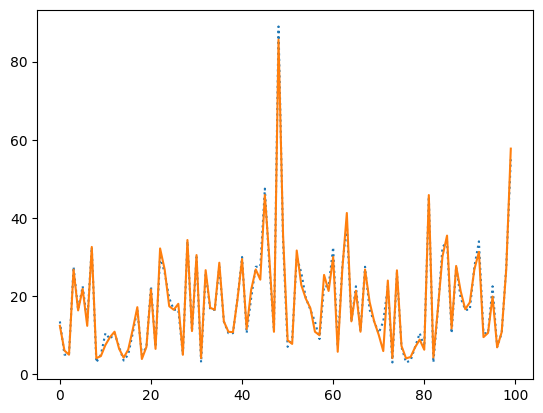

In [8]:
import matplotlib.pyplot as plt

plt.plot(list(df_result['Actual'][200: 300]), linestyle = 'dotted')
plt.plot(list(df_result['Predicted'][200: 300]))
plt.show()